In [24]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model,baselinish2,complex_pokemon_model2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
X_train, X_test, Y_train, Y_test, labels_train, labels_test = load_data()
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

mean_val = np.mean(Y_train)

0
Shape of X_train, X_test, Y_train, Y_test: 481 121
(481, 64, 64, 1)
(121, 64, 64, 1)
(481, 64, 64, 3)
(121, 64, 64, 3)


In [10]:
def show_images(images,gray = False):
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);
    plt.show()

hola >>>>>>>>>>>>>>>>>>>>
INFO:tensorflow:Restoring parameters from ../models/image_net_pok_model_trained/new_model


INFO:tensorflow:Restoring parameters from ../models/image_net_pok_model_trained/new_model


0.0191667


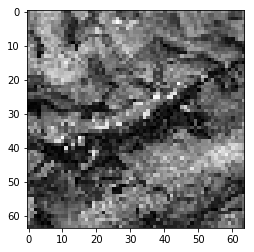

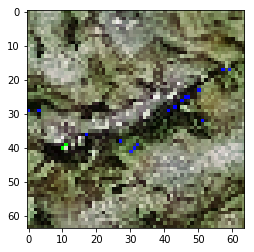

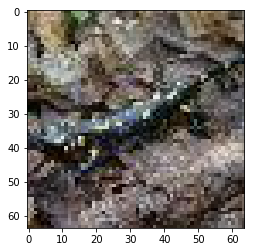

In [11]:
tf.reset_default_graph()

Y = tf.placeholder(tf.uint8 ,[None, 64, 64, 3])

is_training = tf.placeholder(tf.bool)


with tf.variable_scope("model") as scope:
    hsv_out,rgb_out,hsv_in,rgb_in = complex_pokemon_model2(Y,is_training)
    loss = tf.reduce_mean(tf.square(rgb_out-rgb_in))
    
    global_step = tf.Variable(0, trainable=False)
    starter_learning_rate = 0.01
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           100, 0.98, staircase=True)
# Passing global_step to minimize() will increment it at each step.
    train_step = (tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step))


sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess,'../models/image_net_pok_model_trained/new_model')
import matplotlib.pyplot as plt
import numpy.random as rnd

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


rand_indices = np.random.choice(100,48)
#samp = Y_train[rand_indices]
samp = Y_train

feed_dict = {Y:samp,is_training:True}
losses,rgb_o,rgb_i = sess.run([loss,rgb_out,rgb_in],feed_dict)
print (losses)
show_images(rgb2gray(rgb_i[0]),gray = True)
show_images(rgb_o[0])
show_images(rgb_i[0])

    

In [2]:
from resnet50 import ResNet50
from keras.preprocessing import image
from PIL import Image
from imagenet_utils import preprocess_input, decode_predictions

Using TensorFlow backend.


In [3]:
model = ResNet50(weights='imagenet')

In [40]:
from skimage.transform import resize
for i in range(len(rgb_i)):
    x = resize(rgb_i[i],(224,224), mode='reflect', preserve_range=True)
    x = np.expand_dims(x, axis=0)
    preds_x = model.predict(x)
    y = resize(rgb_o[i],(224,224), mode='reflect', preserve_range=True)
    y = np.expand_dims(y, axis=0)
    preds_y = model.predict(y)
    a = decode_predictions(preds_x)
    b = decode_predictions(preds_y)
    print("image number:", i+1)
    print("actual, pred_x, pred_y", labels_train[i], a[0][0], b[0][0])

image number: 1
actual, pred_x, pred_y goldfish, Carassius auratus ('n01930112', 'nematode', 0.14078729) ('n01930112', 'nematode', 0.13729498)
image number: 2
actual, pred_x, pred_y goldfish, Carassius auratus ('n01930112', 'nematode', 0.14788249) ('n01930112', 'nematode', 0.14871353)
image number: 3
actual, pred_x, pred_y goldfish, Carassius auratus ('n01930112', 'nematode', 0.15309827) ('n01930112', 'nematode', 0.15266855)
image number: 4
actual, pred_x, pred_y goldfish, Carassius auratus ('n01930112', 'nematode', 0.15202205) ('n01930112', 'nematode', 0.15172252)
image number: 5
actual, pred_x, pred_y goldfish, Carassius auratus ('n01930112', 'nematode', 0.14914604) ('n01930112', 'nematode', 0.14822142)
image number: 6
actual, pred_x, pred_y goldfish, Carassius auratus ('n01930112', 'nematode', 0.15234996) ('n01930112', 'nematode', 0.15376854)
image number: 7
actual, pred_x, pred_y goldfish, Carassius auratus ('n01930112', 'nematode', 0.15740249) ('n01930112', 'nematode', 0.1572243)


'goldfish, Carassius auratus'